# Preprocessing compilée

<div>
<b>Objectif:</b>
 Après avoir développé indépendemant chaques partie du preprocessing nous avons besoin de construire un pipeline claire permettant d'appliquer les transformations de notre jeux de données palient en maximum les problèmes détecter de celui-ci dans le carde d'un jeu de données permettant le développement d'un modèle de deep learning de classification.
</div>

*Jeu de données* : [Accessible sur Kaggle](https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database)
<div>
<b>Etapes de preprocessing :</b>
</div>

- Suppression des doublons 
- Equilibrage des classes avec augmentation 
- Filtrage par qualité des images
- Reduction des dimensions

Ces différentes étapes rendent en output une modification du dossier d'appelle et donc enregiste en local les modification effectuée, il est donc important d'avoir un `backup` du DB

Arboressance du projet : 

```
bds_covid-19_2
│
├── main/
│   ├── README.md
│   ├── LICENSE
│   ├── Resumé_rapport_equipe.docx
|   └── Reduction_dimensions/
│       ├── PCA EigenImage vs Autoencoder_Analyse de la Réduction Dimensionnelle.docx
│       └── Reduction_dimensions.ipynb
│
├── branch_1/
│   ├── COVID-19_Radiography_Dataset
│   │   ├── COVID/
│   │   ├── Normal/
│   │   ├── Lung_Opacity/
│   │   ├── Viral Pneumonia/
│   │   ├── COVID.metadata.xlsx
│   │   ├── Lung_Opacity.metadata.xlsx
│   │   ├── Normal.metadata.xlsx
│   │   ├── README.md.txt
│   │   └── Viral Pneumonia.metadata.xlsx
│   ├── Exploration_et_preprocessing/
│   │   ├── Comparaison_Laplacien_Original.pdf
│   │   ├── Laplacian.py
│   │   ├── Laplacien_mobile_net.py
│   │   ├── Rapport_170425 (1).pdf
│   │   └── Resume_rapport_equipe.docx
│   ├── LICENSE
│   └── README.md    
│
├── EDA/
│   ├── LICENSE
│   ├── README.md
│   └── Resumé_rapport_equipe.docx
│
└── Preprocessing/
    ├── Augmentation_images/
    │   ├── Augmentation_images.ipynb
    │   └── requirements
    ├── Reduction_dimensions/
    │   ├── PCA EigenImage vs Autoencoder_Analyse de la Réduction Dimensionnelle.docx
    │   └── Reduction_dimensions.ipynb
    ├── LICENSE
    ├── README.md
│   └── Resumé_rapport_equipe.docx

# Appel des librairies 

In [18]:
# Importation des données 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import tensorflow as tf
import pathlib

#Augmentation des images 
import random
from tensorflow.keras.layers import RandomZoom, RandomRotation, RandomContrast, Rescaling, Resizing, RandomBrightness

#Modelisation
from collections import defaultdict
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import Input
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns

#Filtration Lapiacienne
import cv2
import math

# Suppression des doublons

> Plusieur listes ont été crée (une pour chaques classes) contenant les images similaire grâce à un indice de similarité SSIM< 0.95.
> Les images contenu dans cette liste sont considéré comme des doublons strict d'une autre image contenu dans le jeu de données elle est donc supprimer 
Cette suppression ce fait en local et permet dans une modification permanante du jeux de donnée

In [19]:


# Chemin vers le fichier CSV et le dossier contenant les images
csv_path_covid = r"C:\Users\grego\OneDrive\Bureau\bds_covid-19_2\Doublons\doublons_covid.csv"
images_folder_covid = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\COVID\images"
csv_path_normal = r"C:\Users\grego\OneDrive\Bureau\bds_covid-19_2\Doublons\doublons_normal.csv"
images_folder_normal = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Normal\images"
csv_path_pneumonia = r"C:\Users\grego\OneDrive\Bureau\bds_covid-19_2\Doublons\doublons_pneumonia.csv"
images_folder_pneumonia = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Viral_Pneumonia\images"

# Charger la liste des doublons (suppose que le CSV contient une colonne "filename")
df_covid = pd.read_csv(csv_path_covid)
df_normal = pd.read_csv(csv_path_normal)
df_pneumonia = pd.read_csv(csv_path_pneumonia)

# Supprimer les fichiers listés
for filename in df_covid['filename']:
    image_path = os.path.join(images_folder_covid, filename)
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Supprimé : {filename}")
    else:
        print(f"Non trouvé : {filename}")

for filename in df_normal['filename']:
    image_path = os.path.join(images_folder_normal, filename)
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Supprimé : {filename}")
    else:
        print(f"Non trouvé : {filename}")

for filename in df_pneumonia['filename']:
    image_path = os.path.join(images_folder_pneumonia, filename)
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Supprimé : {filename}")
    else:
        print(f"Non trouvé : {filename}")


Supprimé : COVID-21.png
Supprimé : COVID-52.png
Supprimé : COVID-100.png
Supprimé : COVID-139.png
Supprimé : COVID-140.png
Supprimé : COVID-158.png
Supprimé : COVID-160.png
Supprimé : COVID-169.png
Supprimé : COVID-178.png
Supprimé : COVID-181.png
Supprimé : COVID-190.png
Supprimé : COVID-214.png
Supprimé : COVID-220.png
Supprimé : COVID-224.png
Supprimé : COVID-227.png
Supprimé : COVID-229.png
Supprimé : COVID-230.png
Supprimé : COVID-232.png
Supprimé : COVID-234.png
Supprimé : COVID-235.png
Supprimé : COVID-237.png
Supprimé : COVID-247.png
Supprimé : COVID-250.png
Supprimé : COVID-253.png
Supprimé : COVID-270.png
Supprimé : COVID-280.png
Supprimé : COVID-316.png
Supprimé : COVID-321.png
Supprimé : COVID-331.png
Supprimé : COVID-334.png
Supprimé : COVID-340.png
Supprimé : COVID-344.png
Supprimé : COVID-348.png
Supprimé : COVID-355.png
Supprimé : COVID-372.png
Supprimé : COVID-376.png
Supprimé : COVID-392.png
Supprimé : COVID-403.png
Supprimé : COVID-419.png
Supprimé : COVID-420.png
Su

## Augmentation d'images des deux classes minoritaire: 

>Les classes minoritaire qui correspondent aux classes avec un nombres d'occurance < 6000, sont augmentée selon trois couches : 
> RandomZomm, RandomRotation, RandomContrast. Des étapes de resizing et de rescaling sont aussi appliquées.
>Ces étapes permettent donc un equilibre des 4 classes (il faut resuire la taille des classes majoritaire avant entrainement)

In [20]:

# === PARAMÈTRES GÉNÉRAUX ===
target_size = (256, 256)
target_per_class = 6000
augmentations = [RandomZoom(0.1), RandomRotation(0.1), RandomContrast(0.1), Resizing(*target_size), Rescaling(1./255)]

# === FONCTION D'AUGMENTATION AVEC SAUVEGARDE ===
def augmenter_et_sauver(folder_path, label):
    # Charger les fichiers d’image valides
    image_filenames = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"Classe {label} : {len(image_filenames)} images trouvées")

    # Créer le dossier pour les images augmentées
   

    # Charger les images en tableaux numpy (uint8)
    images = []
    for f in image_filenames:
        img = load_img(os.path.join(folder_path, f), target_size=target_size)
        img = img_to_array(img)  # dtype=float32, valeurs [0, 255]
        images.append(img)

    count = len(images)

    if count >= target_per_class:
        print(f" ✂️ Réduction à {target_per_class}")
        images = images[:target_per_class]
    else:
        to_generate = target_per_class - count
        print(f" ➕ Génération de {to_generate} images")

        for i in range(to_generate):
            # Choisir une image existante au hasard
            img = random.choice(images)
            img = tf.convert_to_tensor(img, dtype=tf.float32) / 255.0  # normalisation pour les couches Keras

            # Appliquer chaque augmentation dans un batch (batch dim requise)
            img_aug = tf.expand_dims(img, 0)
            for aug in augmentations:
                img_aug = aug(img_aug, training=True)
            img_aug = tf.squeeze(img_aug, 0)  # enlever la dimension batch

            # Recadrer les valeurs [0, 1] puis reconvertir en image
            img_aug = tf.clip_by_value(img_aug, 0.0, 1.0)
            img_aug_pil = array_to_img(img_aug)  # tf.keras gère conversion -> image PIL

            # Sauvegarde
            img_aug_pil.save(os.path.join(folder_path, f"aug_{i}.png"))

# === UTILISATION ===
augmenter_et_sauver(
    r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\COVID\images", label=1)

augmenter_et_sauver(
    r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Viral_Pneumonia\images", label=3)


Classe 1 : 3364 images trouvées
 ➕ Génération de 2636 images
Classe 3 : 1338 images trouvées
 ➕ Génération de 4662 images


KeyboardInterrupt: 

# Reduction des classes majoritaires

In [21]:
import os

# === PARAMÈTRES ===
folder_path_normal = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Normal\images"
folder_path_opacity = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Lung_opacity\images"

keep_limit = 6000
image_extensions = ('.png', '.jpg', '.jpeg')

# === RÉCUPÉRATION ET TRI DES FICHIERS D'IMAGES ===
all_images = sorted([
    f for f in os.listdir(folder_path_normal)
    if f.lower().endswith(image_extensions)
])

# === SUPPRESSION DES FICHIERS EN TROP ===
images_to_delete = all_images[keep_limit:]

for filename in images_to_delete:
    os.remove(os.path.join(folder_path_normal, filename))

print(f"{len(images_to_delete)} images supprimées. {keep_limit} restantes.")

# === RÉCUPÉRATION ET TRI DES FICHIERS D'IMAGES ===
all_images = sorted([
    f for f in os.listdir(folder_path_opacity)
    if f.lower().endswith(image_extensions)
])

# === SUPPRESSION DES FICHIERS EN TROP ===
images_to_delete = all_images[keep_limit:]

for filename in images_to_delete:
    os.remove(os.path.join(folder_path_opacity, filename))

print(f"{len(images_to_delete)} images supprimées. {keep_limit} restantes.")

4191 images supprimées. 6000 restantes.
12 images supprimées. 6000 restantes.


# Filtration par qualité des images 

>Ici une filtration des images de mauvaise qualitée est effectuée en appliquant un noyau Lapiacien aux images et en appliquant comme
>threshold qui correspond à la sensibilité de la selection de 30
>Cette etapes permet donc d'augmentée la qualité de notre data

Dossier de destination pour les images nettes : C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Lapiacien
--------------------------------------------------
Début du traitement des images avec un seuil de flou de 30...
Les images avec une variance >= 30 seront considérées comme nettes et sauvegardées.
Les images avec une variance < 30 seront considérées comme floues et ignorées.
--------------------------------------------------

--- Traitement du dossier source : C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\COVID\images ---
  Dossier de destination pour ce type d'image : C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Lapiacien\images
  [SAUVÉ] - Variance : 51.35 - COVID-1.png
  [SAUVÉ] - Variance : 50.08 - COVID-10.png
  [SAUVÉ] - Variance : 101.05 - COVID-100.png
  [SAUVÉ] - Variance : 100.35 - COVID

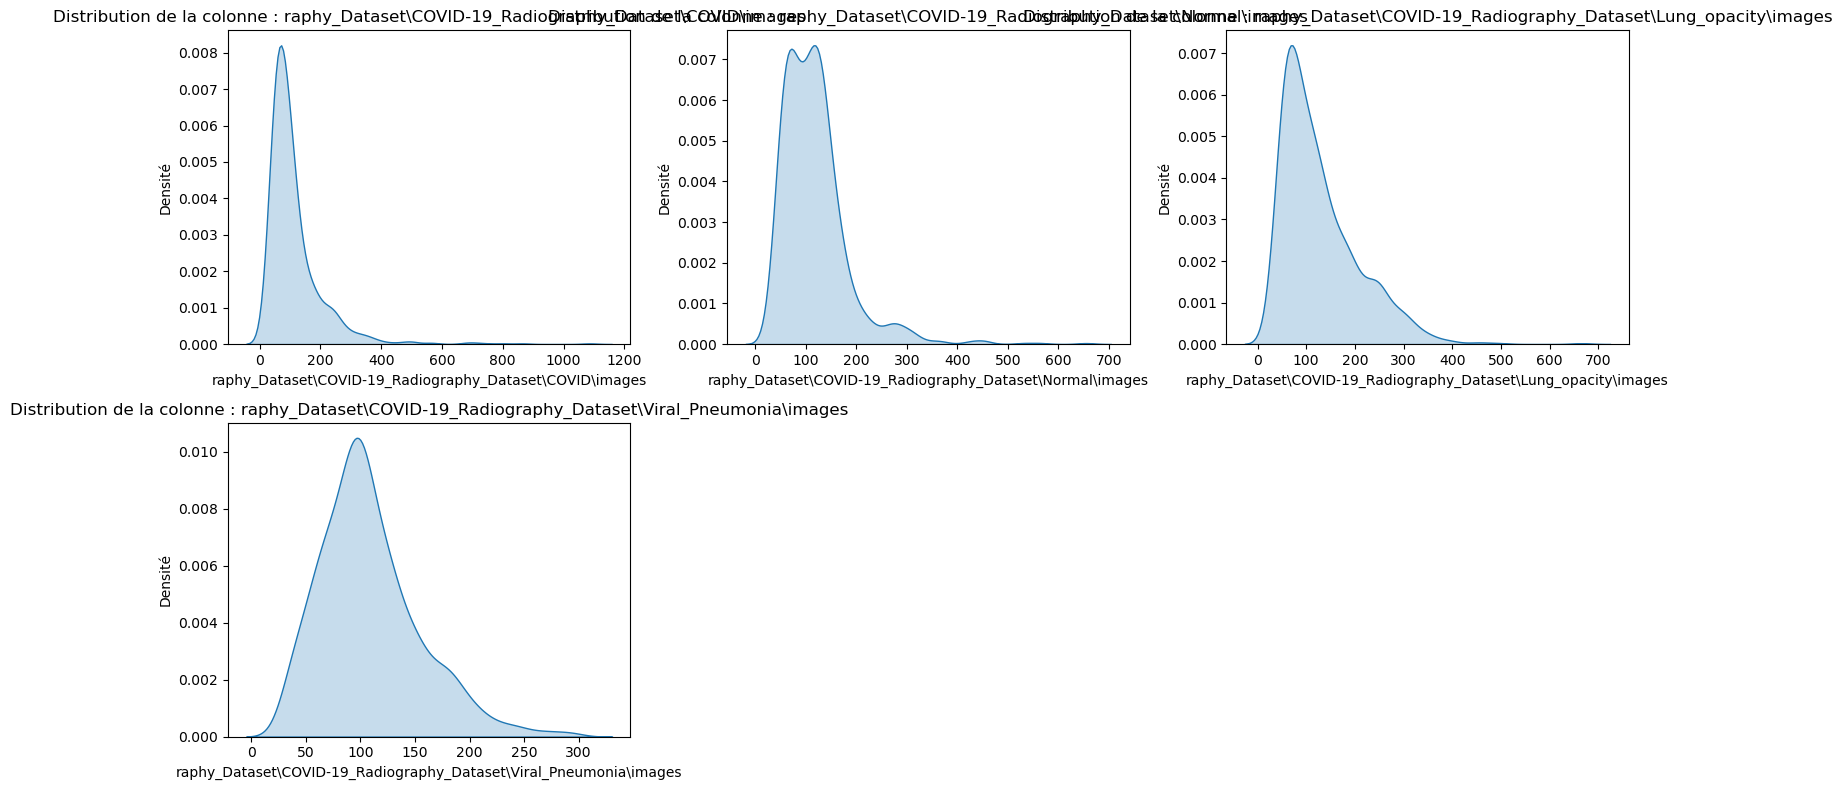

In [ ]:


# Dossiers des fichiers de base
COVID_DIR = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\COVID\images"
NORMAL_DIR = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Normal\images"
LUNG_OP_DIR = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Lung_opacity\images"
VIRAL_PNEUM_DIR = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Viral_Pneumonia\images"
BLUR_THRESHOLD = 30 # Le seuil de flou

# Dossier de destination pour les images "nettes"
DESTINATION_DIR = r"C:\Users\grego\OneDrive\Bureau\Data_Science\Projet\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Lapiacien"

# Extensions d'image supportées
IMAGE_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

# --- Fonction pour calculer la variance du Laplacien (modifiée) ---
def calculate_blur_variance_and_load(image_path):
    """
    Charge une image, la convertit en niveaux de gris, applique le Laplacien,
    et retourne la variance du résultat ainsi que l'image originale chargée.
    Retourne (None, None) en cas d'erreur.
    """
    try:
        img = cv2.imread(image_path)

        # Vérifier si l'image a été chargée correctement
        if img is None:
            print(f"Erreur : Impossible de charger l'image {image_path}")
            return None, None

        # Convertir en niveaux de gris (au cas où l'image serait encodée malgré tout en BGR)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Appliquer l'opérateur Laplacien
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)

        # Calculer la variance
        variance = np.var(laplacian)

        return variance, img # Retourne la variance et l'image chargée

    except Exception as e:
        print(f"Erreur lors du traitement de l'image {image_path}: {e}")
        return None, None # En cas d'erreur

# Créé un DataFrame pour accueillir les variances
# Post-Laplacien
df_var_laplacien = pd.DataFrame([])
# Pré-Laplacien
df_var_originale = pd.DataFrame([])

# --- Traitement des dossiers ---
if __name__ == "__main__":
    # Liste des dossiers sources à traiter
    directories_to_process = [COVID_DIR, NORMAL_DIR, LUNG_OP_DIR, VIRAL_PNEUM_DIR]

    # --- Créer le dossier de destination s'il n'existe pas ---
    # exist_ok=True permet d'éviter une erreur au cas où le dossier existe
    os.makedirs(DESTINATION_DIR, exist_ok=True)
    print(f"Dossier de destination pour les images nettes : {DESTINATION_DIR}")
    print("-" * 50)

    print(f"Début du traitement des images avec un seuil de flou de {BLUR_THRESHOLD}...")
    print(f"Les images avec une variance >= {BLUR_THRESHOLD} seront considérées comme nettes et sauvegardées.")
    print(f"Les images avec une variance < {BLUR_THRESHOLD} seront considérées comme floues et ignorées.")
    print("-" * 50)


    # Parcourir chaque dossier source
    for current_dir in directories_to_process: # Répète la boucle pour tous les dossiers d'images
        print(f"\n--- Traitement du dossier source : {current_dir} ---")

        # Extraire le nom du sous-dossier pour la destination
        subdir_name = os.path.basename(current_dir) # Récupère le nom du dossier d'images
        destination_subdir = os.path.join(DESTINATION_DIR, subdir_name) # Lie le dossier d'images au dossier de destination

        # Créer le sous-dossier de destination (COVID, Normal, etc.)
        os.makedirs(destination_subdir, exist_ok=True)
        print(f"  Dossier de destination pour ce type d'image : {destination_subdir}")


        # Lister tous les fichiers dans le dossier source
        all_files = os.listdir(current_dir)

        saved_images_count = 0
        ignored_images_count = 0
        processed_images_count = 0

        # Créé une liste par sous-dossier pour stocker les variances

        # Post-Laplacien
        l = pd.Series([])

        # Pré-Laplacien
        l_original = pd.Series([])
        # Créer un compteur pour le pré-Laplacien
        n_origine = 0
        # Parcourir chaque fichier
        for filename in all_files:
            file_path = os.path.join(current_dir, filename)

            # Vérifier si c'est un fichier et s'il a une extension d'image supportée
            if os.path.isfile(file_path):
                file_extension = os.path.splitext(filename)[1].lower()
                if file_extension in IMAGE_EXTENSIONS:
                    processed_images_count += 1
                    # Calculer la variance de flou et charger l'image
                    variance, img = calculate_blur_variance_and_load(file_path)
                    # Ajouter la variance du fichier, quelle qu'elle soit
                    l_original[n_origine] = variance
                    n_origine += 1
                    # Si le calcul a réussi (variance n'est pas None)
                    if variance is not None:
                        # Comparer la variance au seuil
                        if variance >= BLUR_THRESHOLD:
                            # --- L'image est considérée comme nette : on la sauvegarde ---
                            destination_file_path = os.path.join(destination_subdir, filename)
                            cv2.imwrite(destination_file_path, img)
                            print(f"  [SAUVÉ] - Variance : {variance:.2f} - {filename}")
                            saved_images_count += 1

                            # On ajoute la variance du laplacien au df du dossier
                            l[processed_images_count] = variance
                        else:
                            ignored_images_count += 1
                   
        print(f"\nRésumé pour {subdir_name}:")
        print(f"  Images traitées : {processed_images_count}")
        print(f"  Images sauvegardées (nettes) : {saved_images_count}")
        print(f"  Images ignorées (floues ou erreur) : {ignored_images_count}")

        df_var_laplacien[current_dir[66:]] = l
        df_var_originale[current_dir[66:]] = l_original
    print("\n" + "=" * 50)
    print("--- Traitement global terminé ---")
    print(f"Les images considérées comme nettes (variance >= {BLUR_THRESHOLD:.2f}) ont été sauvegardées dans {DESTINATION_DIR}.")
    print(f"Note : Le seuil de {BLUR_THRESHOLD} est très bas pour la variance du Laplacien. "
          "Tu pourrais avoir besoin d'ajuster ce seuil (souvent dans les centaines ou milliers) "
          "en fonction de la résolution et du contenu de tes images pour obtenir de meilleurs résultats.")
    print("=" * 50)

df = df_var_laplacien.iloc[:1000,:].dropna()
print(df_var_laplacien.head(10))

# Statistiques groupées par dossier
stats = df_var_laplacien.agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
stats.to_excel("Statistiques_t30.xlsx")
print("Statistiques sur les variances du Laplacien :\n")
print(stats)




# Visualisation
print("Aperçu du DataFrame :")
print(df.head())
print("\n" + "="*50 + "\n")

# On exclut les colonnes non num (au cas où)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if not numerical_cols:
    print("Aucune colonne numérique trouvée dans le DataFrame pour tracer les densités.")
else:
    print(f"Colonnes numériques trouvées : {numerical_cols}")

    # --- Déterminer la taille de la grille pour les sous-graphiques ---
    n_cols = 3 # Nombre de colonnes souhaité
    n_rows = math.ceil(len(numerical_cols) / n_cols) # Nombre de lignes nécessaire

    print(f"Création d'une grille de {n_rows}x{n_cols} pour les graphiques.")

    # --- Créer la figure et les sous-graphiques ---
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4)) # Ajuster la taille de la figure

    # Aplatir le tableau d'axes si plus d'une ligne/colonne pour faciliter l'itération
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    # --- Boucler sur chaque colonne numérique et tracer la courbe de densité ---
    for i, col in enumerate(numerical_cols):
        ax = axes[i] # Sélectionner le sous-graphique courant
        sns.kdeplot(data=df, x=col, fill=True, ax=ax)
        ax.set_title(f'Distribution de la colonne : {col}') 
        ax.set_xlabel(col)
        ax.set_ylabel('Densité')

    # --- Masquer les sous-graphiques inutilisés s'il y en a ---
    for j in range(len(numerical_cols), len(axes)):
        fig.delaxes(axes[j]) # Supprimer les axes en trop

    # --- Ajuster la mise en page et afficher les graphiques ---
    plt.tight_layout() # Ajuste automatiquement les paramètres de sous-graphique pour éviter le chevauchement
    plt.show()

# Autoencoder 

> Cette etape primordiale permet la reduction des dimensions des images tout en gardant un maximum d'information presente.
>Elle permet donc de reduire la taille de nos images et donc un entrainement des modèles futur moins couteux


In [ ]:

# === PARAMÈTRES ===
IMG_SIZE = 256 
encoding_dim = 50
COVID_DIR = r"C:\Users\ambro\Desktop\Projet Metier\dataset_original_images\COVID"
NORMAL_DIR = r"C:\Users\ambro\Desktop\Projet Metier\dataset_original_images\Normal"
LUNG_OP_DIR = r"C:\Users\ambro\Desktop\Projet Metier\dataset_original_images\Lung_Opacity"
VIRAL_PNEUM_DIR = r"C:\Users\ambro\Desktop\Projet Metier\dataset_original_images\Viral_Pneumonia"
image_extensions = ('.png', '.jpg', '.jpeg')

# === CHARGEMENT ET PRÉPARATION DES IMAGES ===
## Listing des chemins d'accès
DIR_LISTE = [COVID_DIR, NORMAL_DIR, LUNG_OP_DIR, VIRAL_PNEUM_DIR]

for folder_path in DIR_LISTE:
    images = []
    filenames = []

    for fname in os.listdir(folder_path):
        if fname.lower().endswith(image_extensions):
            img_path = os.path.join(folder_path, fname)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
            img_array = img_to_array(img).astype('float32') / 255.0
            images.append(img_array.reshape(-1))  # Aplatir
            filenames.append(img_path)

    X = np.array(images)

    # === AUTOENCODEUR ===
    input_img = Input(shape=(IMG_SIZE * IMG_SIZE,))
    encoded = Dense(128, activation='relu')(input_img)
    encoded = Dense(encoding_dim, activation='relu')(encoded)

    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(IMG_SIZE * IMG_SIZE, activation='sigmoid')(decoded)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # === ENTRAÎNEMENT ===
    autoencoder.fit(X, X,
                    epochs=20,
                    batch_size=32,
                    shuffle=True)

    # === TRANSFORMATION DES IMAGES ===
    X_decoded = autoencoder.predict(X)

    # === ENREGISTREMENT DES IMAGES ÉCRASÉES ===
    for img_array, path in zip(X_decoded, filenames):
        img_reshaped = img_array.reshape((IMG_SIZE, IMG_SIZE))  # Remettre en forme
        img_pil = array_to_img(np.expand_dims(img_reshaped, axis=-1))  # Ajouter canal
        img_pil.save(path)  # Remplace l’original

Epoch 1/20

479/646 [=====================>........] - ETA: 26s - loss: 0.5886

KeyboardInterrupt: 